In [22]:
# %matplotlib notebook
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [23]:
companies_df = pd.read_csv("sp500/sp500_companies.csv")
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             500 non-null    object 
 1   Symbol               500 non-null    object 
 2   Shortname            500 non-null    object 
 3   Longname             500 non-null    object 
 4   Sector               500 non-null    object 
 5   Industry             500 non-null    object 
 6   Currentprice         500 non-null    float64
 7   Marketcap            500 non-null    float64
 8   Ebitda               469 non-null    float64
 9   Revenuegrowth        499 non-null    float64
 10  City                 500 non-null    object 
 11  State                481 non-null    object 
 12  Country              500 non-null    object 
 13  Fulltimeemployees    472 non-null    float64
 14  Longbusinesssummary  500 non-null    object 
 15  Weight               500 non-null    flo

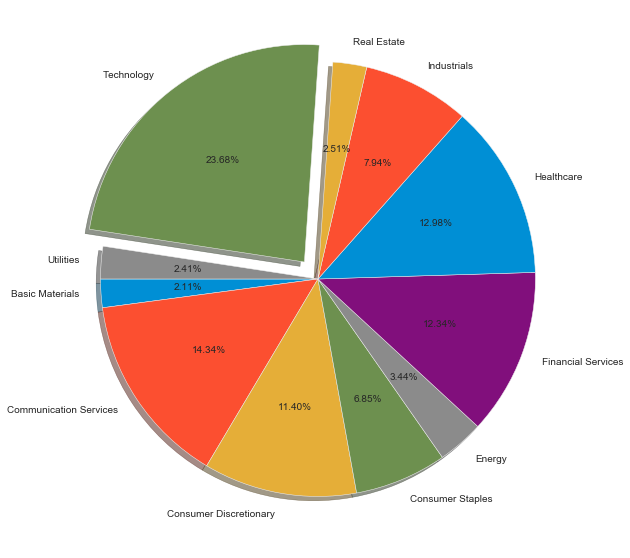

In [24]:
#Marketcap has 500 raws data. no missing information.
sector_distribution = companies_df.groupby("Sector")["Marketcap"].sum()
sector_distribution
# Creat the chart
plt.rc('font', size=10)  
explode = (0,0,0,0,0,0,0,0,0,0.1,0)
sector_distribution.plot(kind = "pie",explode=explode, shadow=True,startangle=180,autopct="%1.2f%%",figsize=(10,10))
plt.axis("off")
plt.savefig("Sector Distribution.png")
# Set appearance
# plt.title("Sex Distribution (across the full timepoints)")

plt.show()


In [25]:
# # Creat the chart
# x_axis = np.arange(len(sector_list))
# tick_locations = [value for value in x_axis]
# colors = []
# for value in price_change:
#     if value <0:
#         colors.append('r')
#     else:
#         colors.append('black')

# plt.figure(figsize=(8,5))
# plt.bar(sector_list, price_change, color=colors, alpha=0.75, align="center",width=0.6)
# plt.xticks(tick_locations,sector_list, rotation=45)
# # Set appearance
# plt.title("Timepoints for Drug Regimen")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Number of Timepoints")
# plt.show()
# plt.tight_layout()


In [26]:
this_year_start = datetime(2022,1,3)
this_year_end = datetime(2022,3,16)

# The tech stocks we'll use for this analysis
sector_list = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
sector_name = ["S&P500", "Financials","Consumer Discretionary","Consumer Staples","Health","Industrials","Information Tech","Materials","Real Estate","Tele Services","Utilities","Energy"]
# Set up End and Start times for data grab
sector_list = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
thisyear = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]

for stock in sector_list: 
    thisyear[sector_list.index(stock)] = globals()[stock] = yf.download(stock, this_year_start, this_year_end)

    
# lastyear = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
# last_year_start = datetime(this_year_start.year-1, this_year_start.month, this_year_start.day)
# last_year_end = datetime(this_year_end.year-1, this_year_end.month, this_year_end.day)
# for stock in sector_list:
#     lastyear[sector_list.index(stock)] = globals()[stock] = yf.download(stock, last_year_start, last_year_end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


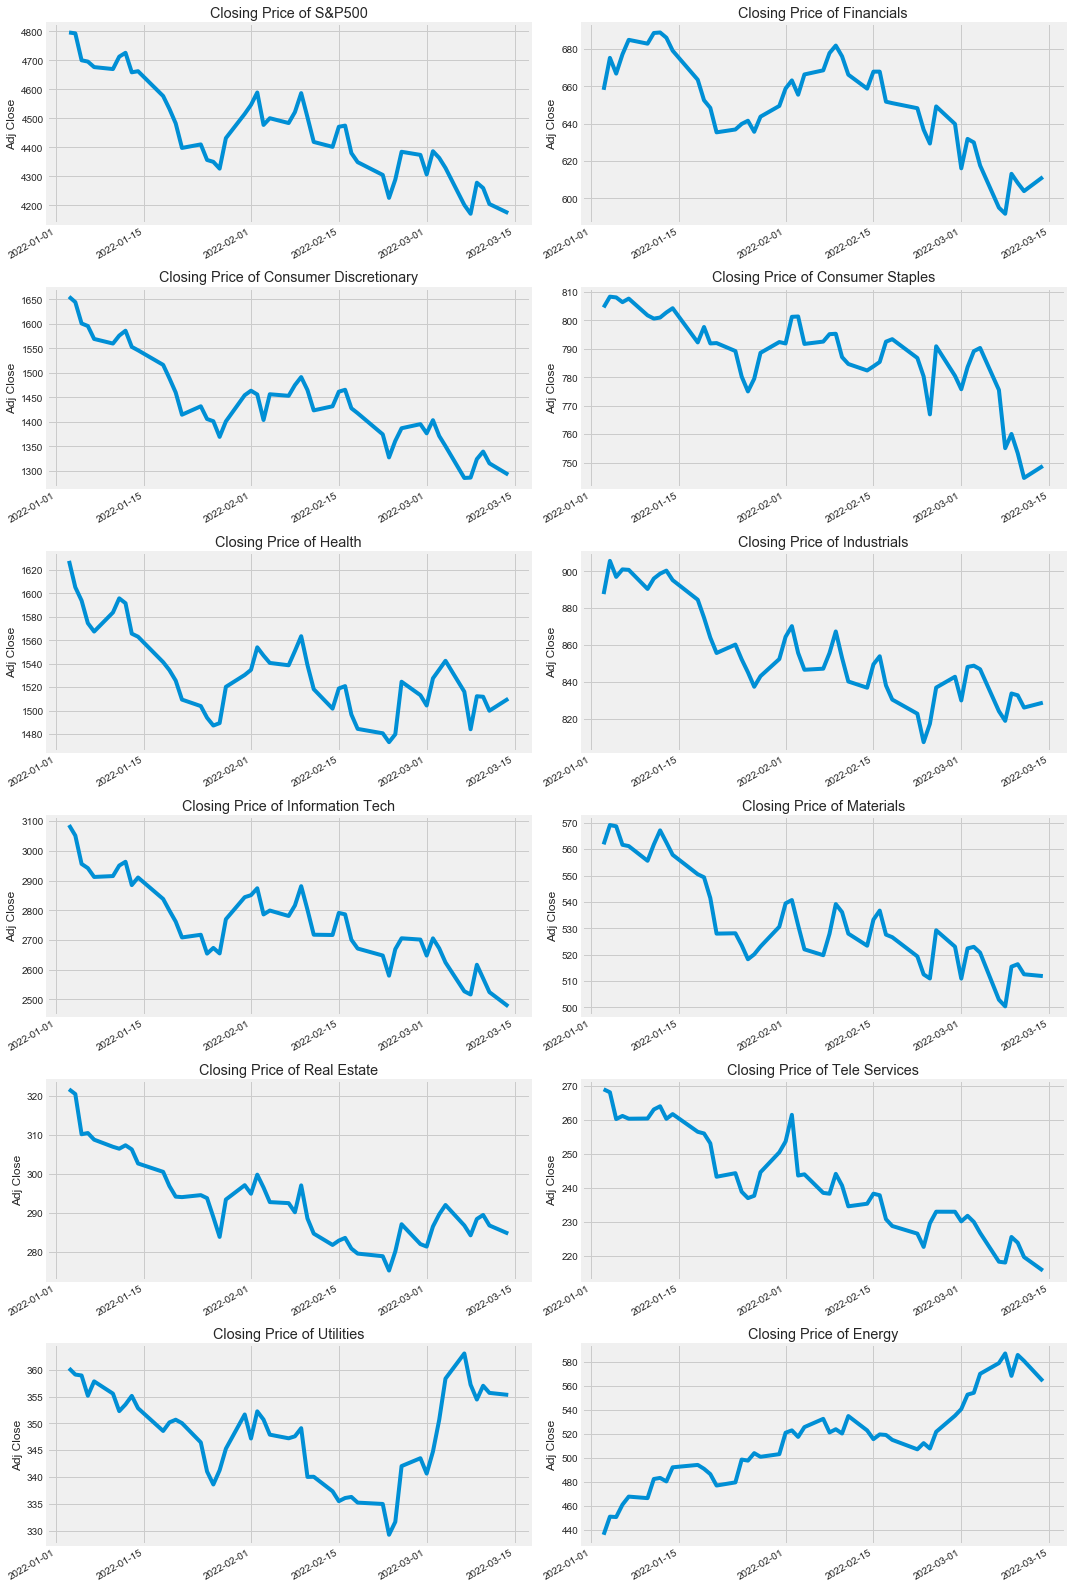

In [27]:
plt.figure(figsize=(15, 40))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, sector in enumerate(sector_list, 1):
    plt.subplot(11, 2, i)
    thisyear[i-1]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {sector_name[i - 1]}")
plt.tight_layout()
plt.savefig(f"Adj Close Change by Sectors({this_year_start.year}).png")    


In [28]:
# plt.figure(figsize=(15, 35))
# plt.subplots_adjust(top=1.25, bottom=1.2)

# for i, sector in enumerate(sector_list, 1):
#     plt.subplot(11, 2, i)
#     lastyear[i-1]['Adj Close'].plot()
#     plt.ylabel('Adj Close')
#     plt.xlabel(None)
#     plt.title(f"Closing Price of {sector_name[i - 1]}")
    
# plt.tight_layout()
# plt.savefig(f"Adj Close Change by Sectors({last_year_start.year}).png")     

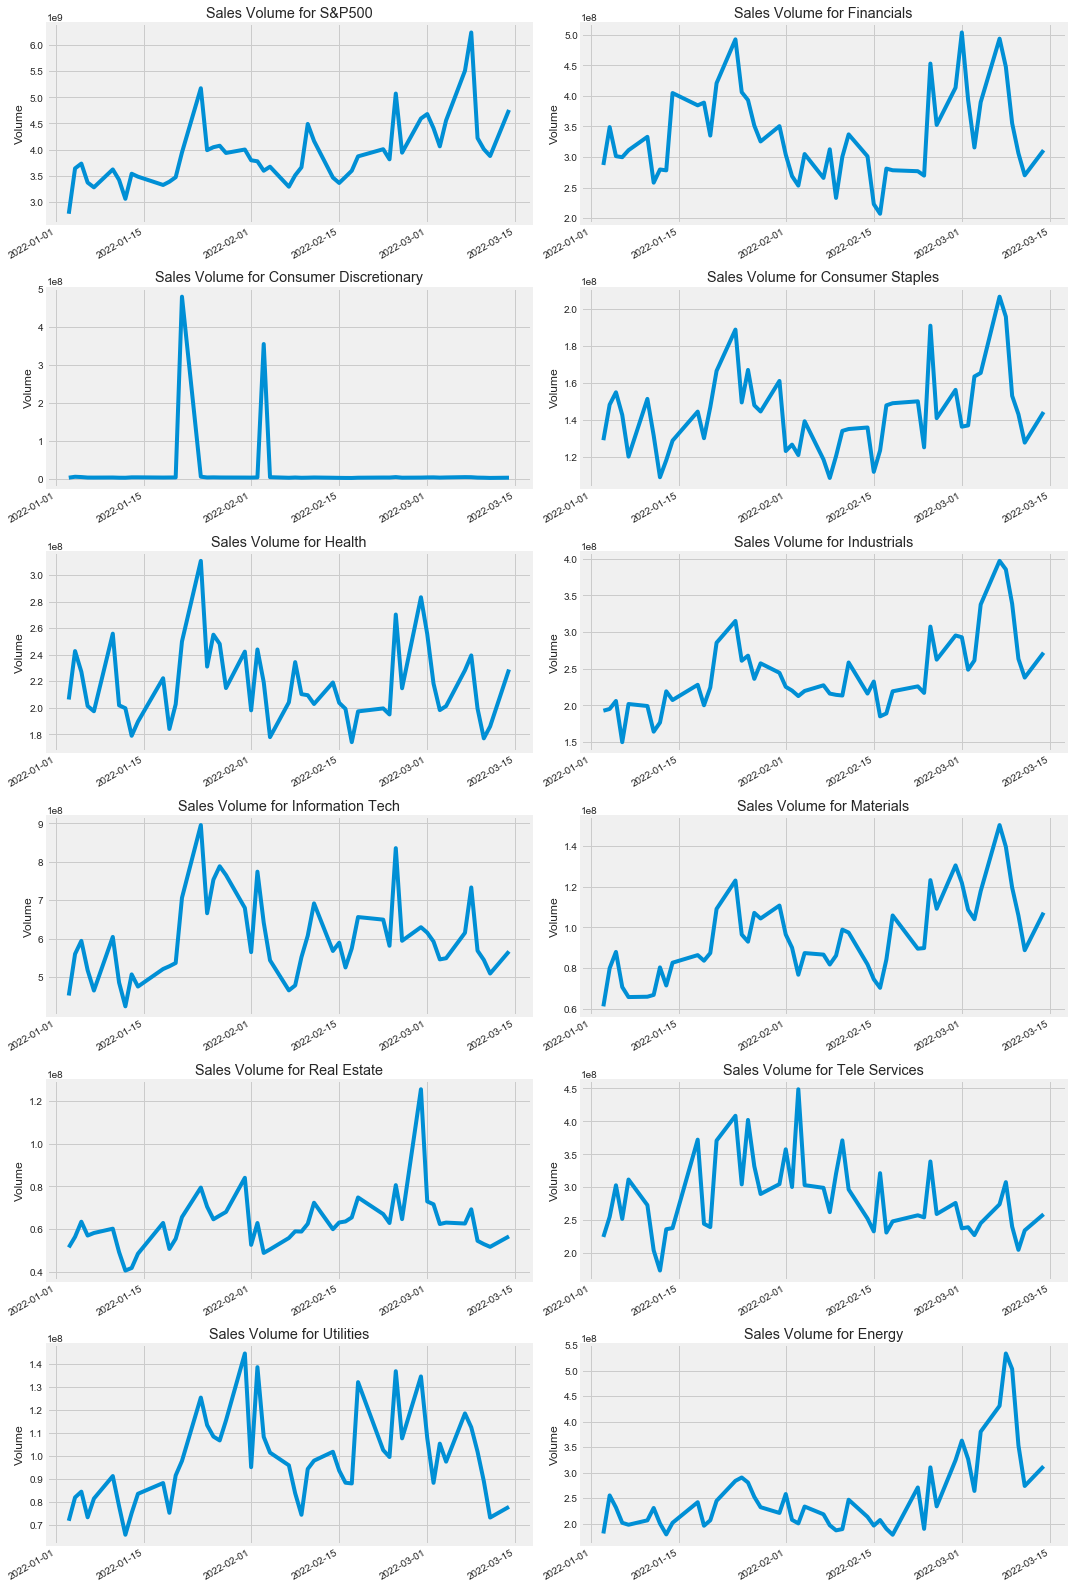

In [29]:
plt.figure(figsize=(15, 40))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, sector in enumerate(sector_list, 1):
    plt.subplot(11, 2, i)
    thisyear[i-1]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {sector_name[i - 1]}")
    plt.tight_layout()
plt.savefig(f"Volume by Sectors({this_year_start.year}).png")        

In [30]:
# plt.figure(figsize=(15, 35))
# plt.subplots_adjust(top=1.25, bottom=1.2)

# for i, sector in enumerate(sector_list, 1):
#     plt.subplot(11, 2, i)
#     lastyear[i-1]['Volume'].plot()
#     plt.ylabel('Volume')
#     plt.xlabel(None)
#     plt.title(f"Sales Volume for {sector_name[i - 1]}")
    
# plt.tight_layout()
# plt.savefig(f"Volume by Sectors({last_year_start.year}).png")    

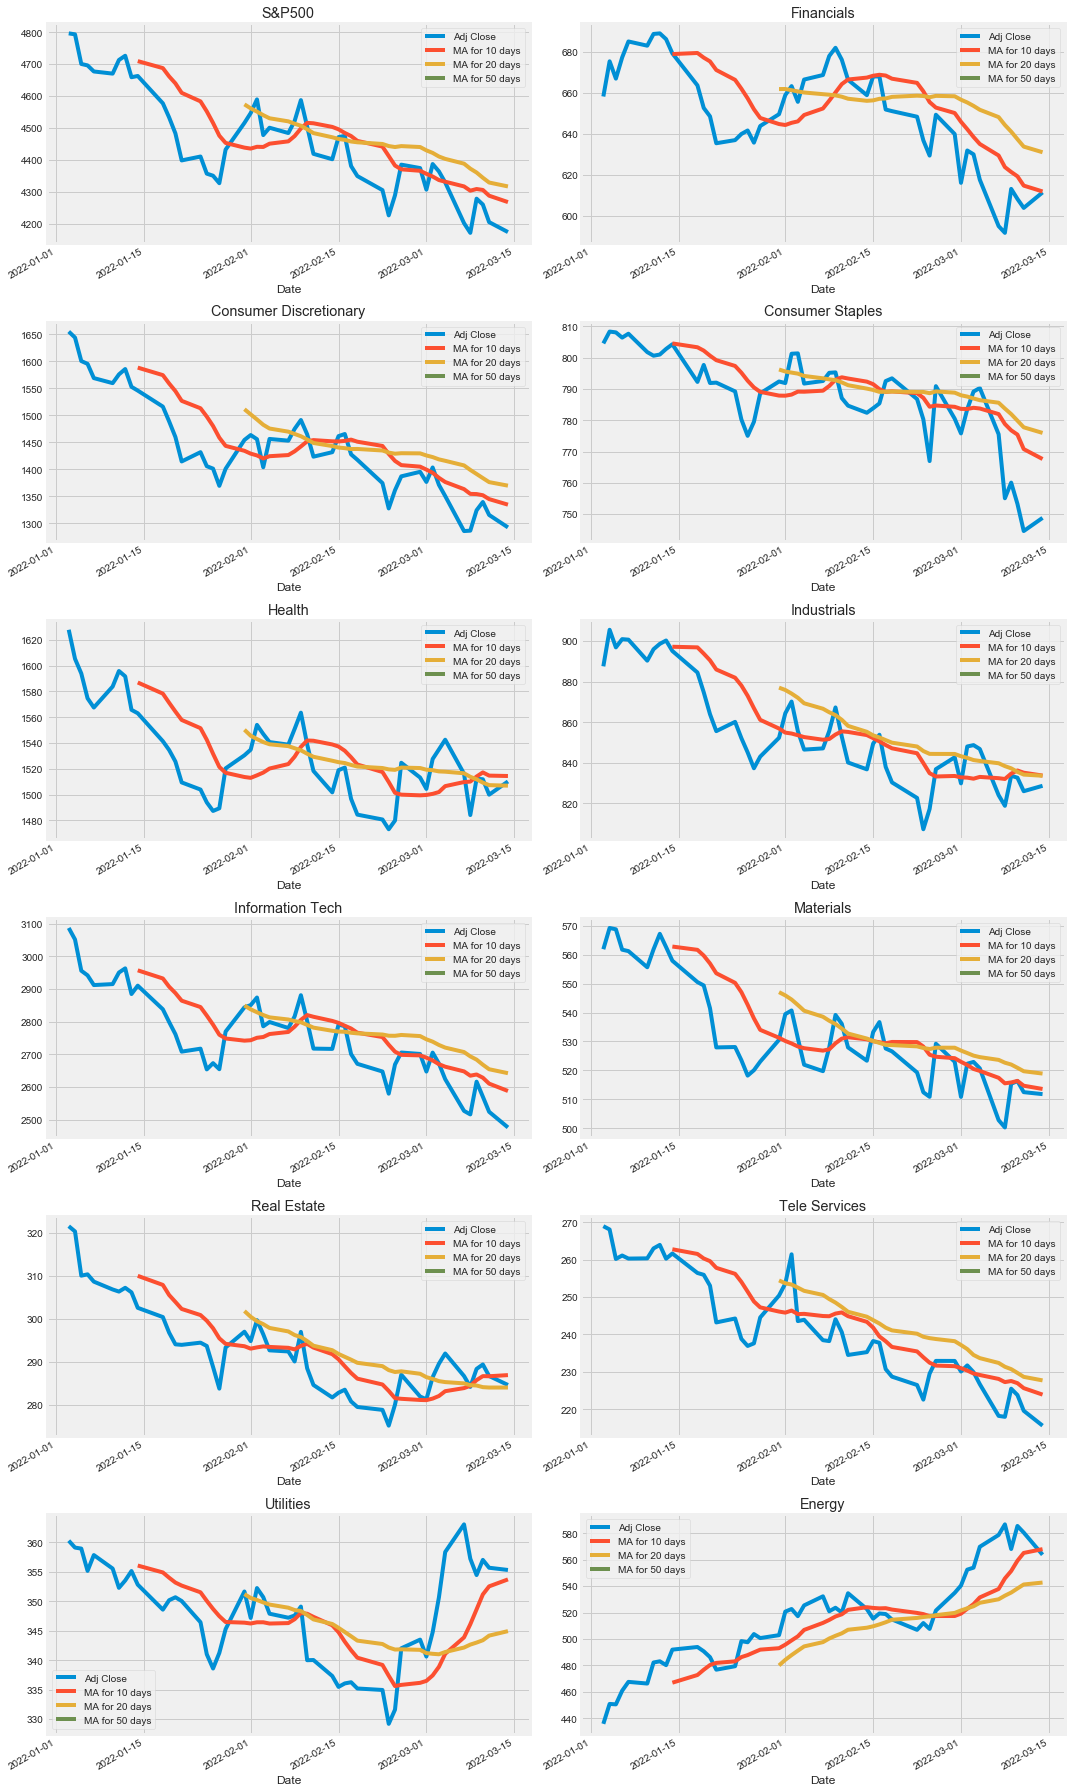

In [31]:
ma_day = [10, 20, 50,100]
for ma in ma_day:
    for i, sector in enumerate(sector_list, 1):
        column_name = f"MA for {ma} days"
        thisyear[i-1][column_name] = thisyear[i-1]['Adj Close'].rolling(ma).mean()
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_figheight(25)
fig.set_figwidth(15)
thisyear[0][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title(f'{sector_name[0]}')
thisyear[1][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title(f'{sector_name[1]}')
thisyear[2][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title(f'{sector_name[2]}')
thisyear[3][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title(f'{sector_name[3]}')
thisyear[4][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title(f'{sector_name[4]}')
thisyear[5][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title(f'{sector_name[5]}')
thisyear[6][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title(f'{sector_name[6]}')
thisyear[7][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,1])
axes[3,1].set_title(f'{sector_name[7]}')
thisyear[8][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[4,0])
axes[4,0].set_title(f'{sector_name[8]}')
thisyear[9][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[4,1])
axes[4,1].set_title(f'{sector_name[9]}')
thisyear[10][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[5,0])
axes[5,0].set_title(f'{sector_name[10]}')
thisyear[11][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[5,1])
axes[5,1].set_title(f'{sector_name[11]}')
fig.tight_layout()
plt.savefig(f"MA by Sectors ({this_year_start.year}).png")        


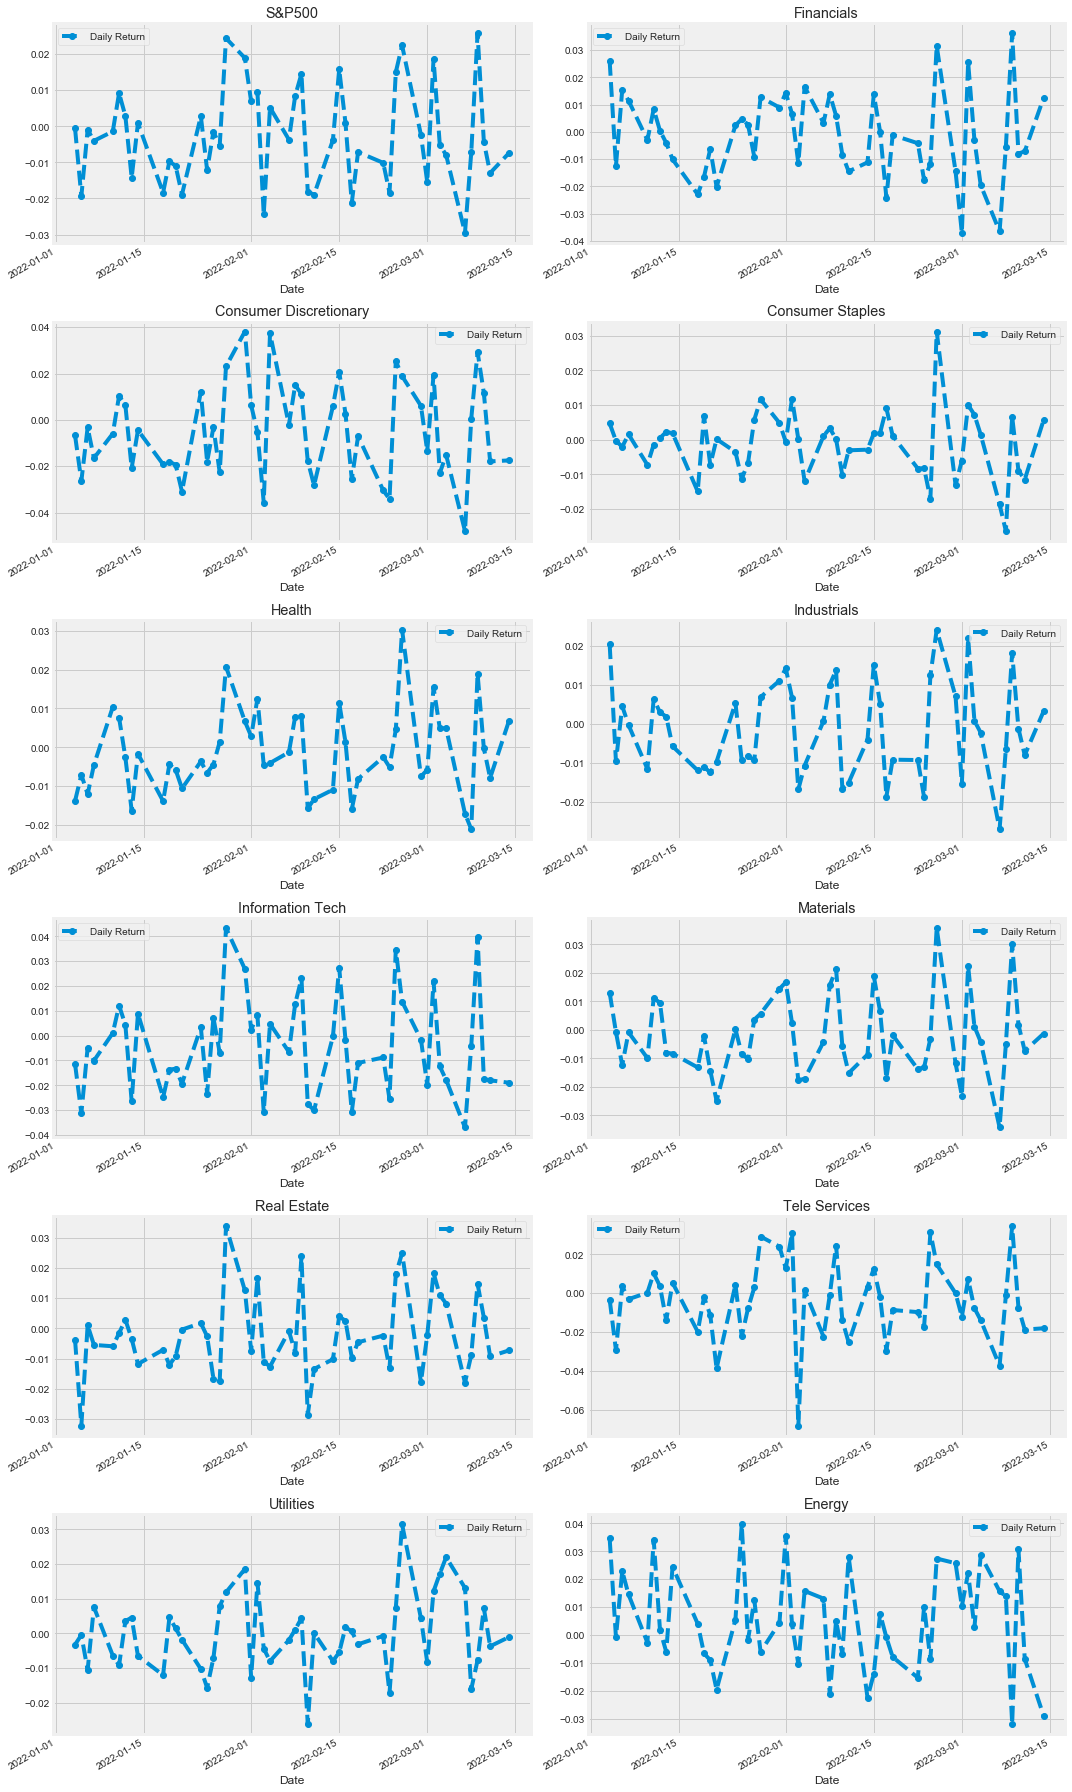

In [32]:
for i, sector in enumerate(sector_list, 1):
    thisyear[i-1]['Daily Return'] = thisyear[i-1]['Adj Close'].pct_change()
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_figheight(25)
fig.set_figwidth(15)
thisyear[0]['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title(f'{sector_name[0]}')
thisyear[1]['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title(f'{sector_name[1]}')
thisyear[2]['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title(f'{sector_name[2]}')
thisyear[3]['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title(f'{sector_name[3]}')
thisyear[4]['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title(f'{sector_name[4]}')
thisyear[5]['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title(f'{sector_name[5]}')
thisyear[6]['Daily Return'].plot(ax=axes[3,0], legend=True, linestyle='--', marker='o')
axes[3,0].set_title(f'{sector_name[6]}')
thisyear[7]['Daily Return'].plot(ax=axes[3,1], legend=True, linestyle='--', marker='o')
axes[3,1].set_title(f'{sector_name[7]}')
thisyear[8]['Daily Return'].plot(ax=axes[4,0], legend=True, linestyle='--', marker='o')
axes[4,0].set_title(f'{sector_name[8]}')
thisyear[9]['Daily Return'].plot(ax=axes[4,1], legend=True, linestyle='--', marker='o')
axes[4,1].set_title(f'{sector_name[9]}')
thisyear[10]['Daily Return'].plot(ax=axes[5,0], legend=True, linestyle='--', marker='o')
axes[5,0].set_title(f'{sector_name[10]}')
thisyear[11]['Daily Return'].plot(ax=axes[5,1], legend=True, linestyle='--', marker='o')
axes[5,1].set_title(f'{sector_name[11]}')
fig.tight_layout()
plt.savefig(f"Daily Return by Sectors ({this_year_start.year}).png")        


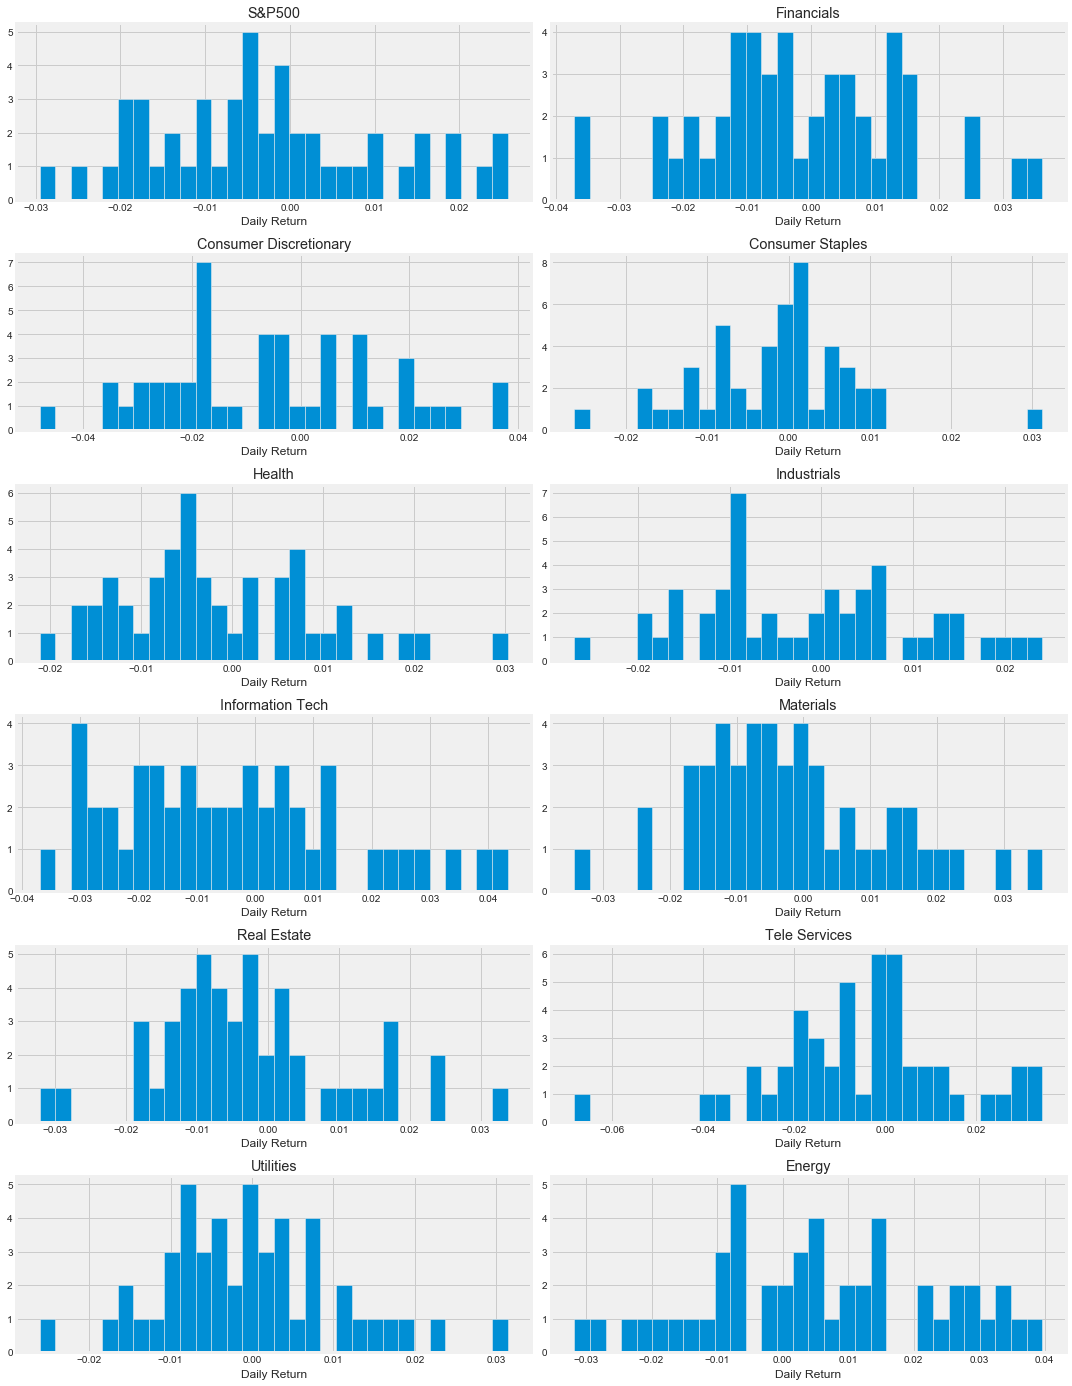

In [33]:
plt.figure(figsize=(15, 35))

for i, sector in enumerate(sector_list, 1):
    plt.subplot(11, 2, i)
    thisyear[i-1]['Daily Return'].hist(bins=30)
    plt.ylabel(None)
    plt.xlabel('Daily Return')
    plt.title(f'{sector_name[i - 1]}')   
plt.tight_layout()

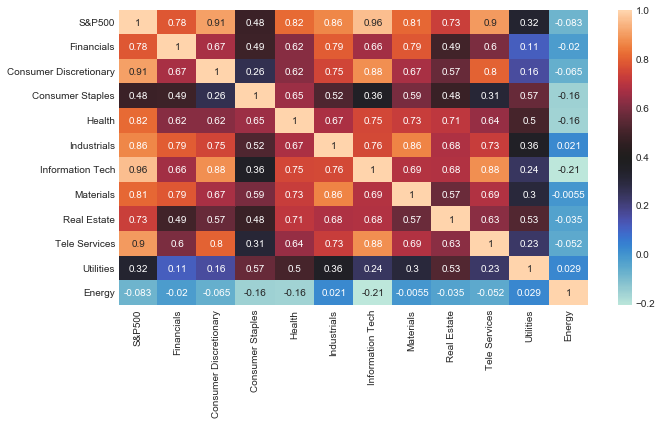

In [34]:
closing_this_year_df = DataReader(sector_list, 'yahoo', this_year_start, this_year_end)['Adj Close']
sector_rate = closing_this_year_df.pct_change()
sector_rate.rename(columns={'^GSPC':"S&P500",'^SP500-40':"Financials",'^SP500-25':"Consumer Discretionary",
                            '^SP500-30':"Consumer Staples","^SP500-35":"Health","^SP500-20":"Industrials",
                            "^SP500-45":"Information Tech","^SP500-15":"Materials","^SP500-60":"Real Estate",
                            "^SP500-50":"Tele Services","^SP500-55":"Utilities","^GSPE":"Energy"}, inplace=True)
plt.figure(figsize=(10,6))
sns.heatmap(sector_rate.corr(), annot=True, cmap='icefire')
plt.xlabel(None)
plt.ylabel(None)

plt.tight_layout()
plt.savefig(f"Correlation by Sectors ({this_year_start.day} {this_year_start.month} {this_year_start.year}).png")    


<Figure size 576x360 with 0 Axes>

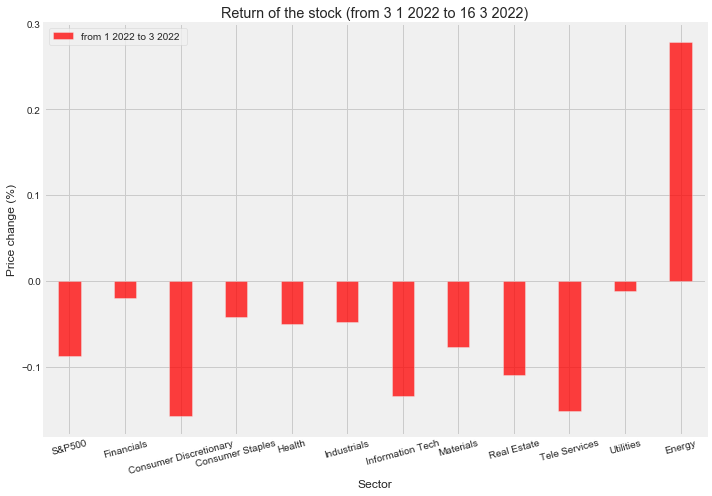

In [35]:
closing_end = DataReader(sector_list, 'yahoo', this_year_end, this_year_end)['Adj Close']
opening_start = DataReader(sector_list, 'yahoo', this_year_start, this_year_start)['Open']

period_return_list=[]
for q in sector_list:
    period_return_list.append((closing_end.loc[closing_end.index.date.max(),q]-opening_start.loc[opening_start.index.date.min(),q])/opening_start.loc[opening_start.index.date.min(),q])
period_return_list

period_return = {f'from {this_year_start.month} {this_year_start.year} to {this_year_end.month} {this_year_end.year} ': period_return_list}
period_return_df = pd.DataFrame(period_return)
period_return_df.index = sector_name

# Creat the chart
x_axis = np.arange(len(sector_list))
tick_locations = [value for value in x_axis]
colors = []
for value in period_return_list:
    if value <0:
        colors.append('r')
    else:
        colors.append('b')

plt.figure(figsize=(8,5))

period_return_df.plot(kind="bar",color = colors, alpha=0.75, align="center",width=0.4,figsize=(10,7))

plt.xticks(tick_locations, rotation=15)
# Set appearance
plt.title(f"Return of the stock (from {this_year_start.day} {this_year_start.month} {this_year_start.year} to {this_year_end.day} {this_year_end.month} {this_year_end.year})")
plt.xlabel("Sector")
plt.ylabel("Price change (%)")
plt.tight_layout()
plt.savefig(f"Return of the stock (from {this_year_start.day} {this_year_start.month} {this_year_start.year} to {this_year_end.day} {this_year_end.month} {this_year_end.year}).png")        

In [36]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(sector_list, 'yahoo', this_year_start, this_year_end)['Adj Close']
sector_rets = closing_df.pct_change().dropna()
sector_rets.rename(columns={'^GSPC':"S&P500",'^SP500-40':"Financials",'^SP500-25':"Consumer Discretionary",
                            '^SP500-30':"Consumer Staples","^SP500-35":"Health","^SP500-20":"Industrials",
                            "^SP500-45":"Information Tech","^SP500-15":"Materials","^SP500-60":"Real Estate",
                            "^SP500-50":"Tele Services","^SP500-55":"Utilities","^GSPE":"Energy"}, inplace=True)
sector_rets.head()

Symbols,S&P500,Financials,Consumer Discretionary,Consumer Staples,Health,Industrials,Information Tech,Materials,Real Estate,Tele Services,Utilities,Energy
Date,,,,,,,,,,,,
2022-01-04,-0.000630,0.026028,-0.006706,0.004698,-0.013828,0.020325,-0.011426,0.013047,-0.003824,-0.003309,-0.003247,0.034578
2022-01-05,-0.019393,-0.012484,-0.026434,-0.000322,-0.007089,-0.009584,-0.031296,-0.000808,-0.032179,-0.029394,-0.000473,-0.000732
2022-01-06,-0.000964,0.015461,-0.003280,-0.002067,-0.012090,0.004526,-0.004821,-0.012362,0.001000,0.003536,-0.010531,0.022904
2022-01-07,-0.004050,0.011475,-0.016510,0.001550,-0.004547,-0.000289,-0.010099,-0.000872,-0.005477,-0.003140,0.007546,0.014515
2022-01-10,-0.001441,-0.002993,-0.005953,-0.007280,0.010392,-0.011502,0.001023,-0.009926,-0.005928,0.000230,-0.006399,-0.002695


In [37]:
# sector_list = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]

The pearson correlation coefficient is: 0.6712150634611095
The p-value is: 9.568009656466731e-08


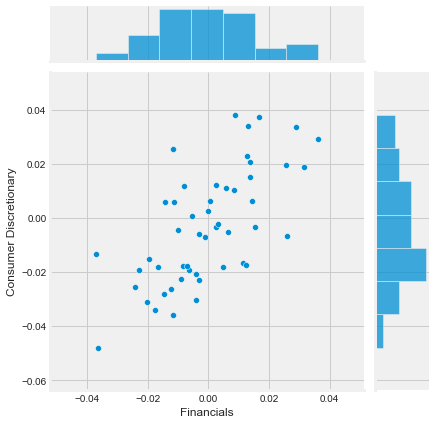

In [38]:
import scipy
from scipy import stats
p = sns.jointplot( data=sector_rets, x = "Financials", y='Consumer Discretionary',kind='scatter')
r, p = scipy.stats.pearsonr(sector_rets["Financials"], sector_rets['Consumer Discretionary'])
print("The pearson correlation coefficient is:", r)
print("The p-value is:", p)

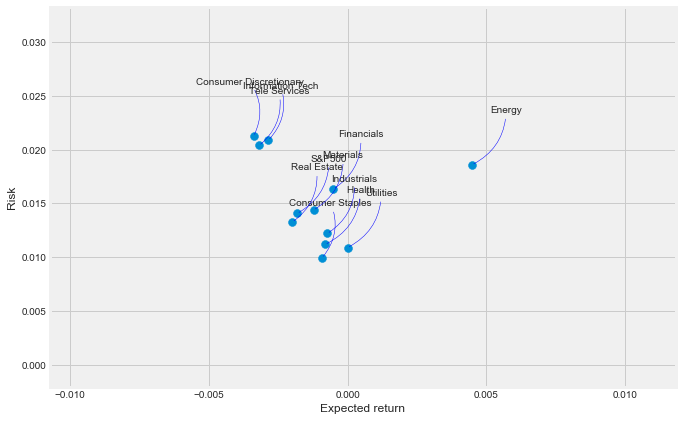

In [39]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = sector_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
# plt.xlim(-0.0001,0.0015)
# plt.ylim(0.007,0.02)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [40]:
rets['Consumer Staples'].quantile(0.05)

-0.01612119911948472

In [41]:
rets['Energy'].quantile(0.05)

-0.02598865592921651

In [42]:
rets['Financials'].quantile(0.05)

-0.023588458910901344